In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import sys
import os
sys.path.insert(0, os.getcwd().rsplit('/',1)[0])

import loops_utils
from loops_utils import LoopChromosomeContainer

from matplotlib.patches import Rectangle

In [2]:
%matplotlib inline

### Bins visualization

In [3]:
# 1 or 5 or 6 to assign chr
chr_num = 1
chr = 'chr' + str(chr_num)

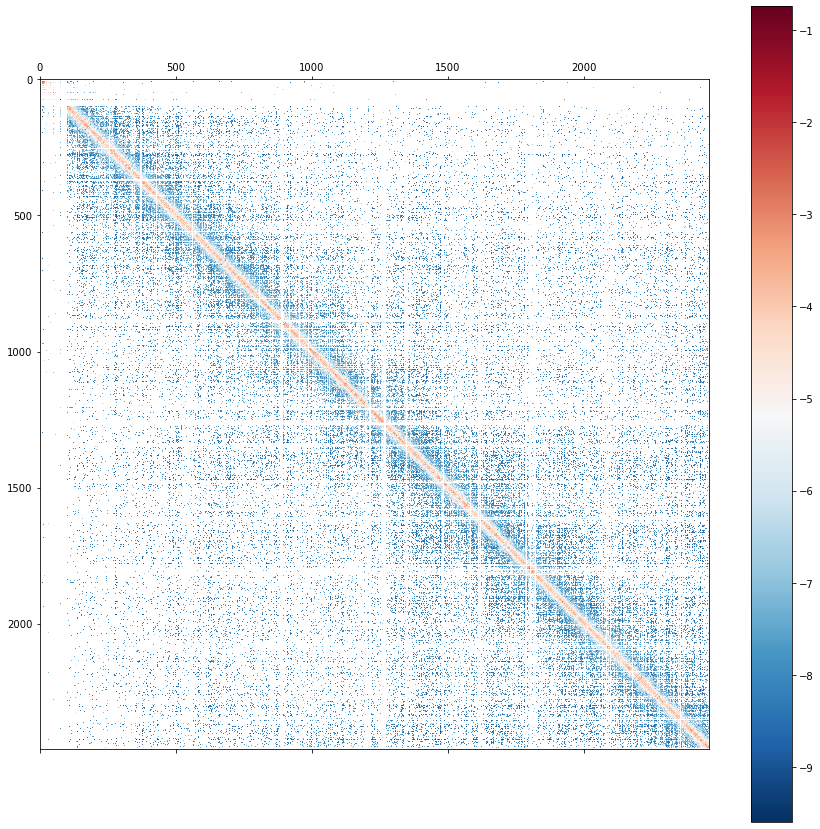

In [4]:
arr = np.load('arrs/2kb_chr'+str(chr_num)+'_log.npy')
loops_utils.plot_HiC(arr, name = 'dicty_hic_raw')

Normalized map was produced by function:
It divides each diagonal of a Hi-C contact map by its' mean.  
It also does it in a smart way: it calculates averages over stripes from X to X*1.05, and divides each stripe by its mean.  
It allows to avoid divergence far from the main diagonal with a very few reads.  
(comment from __mirnylib__)

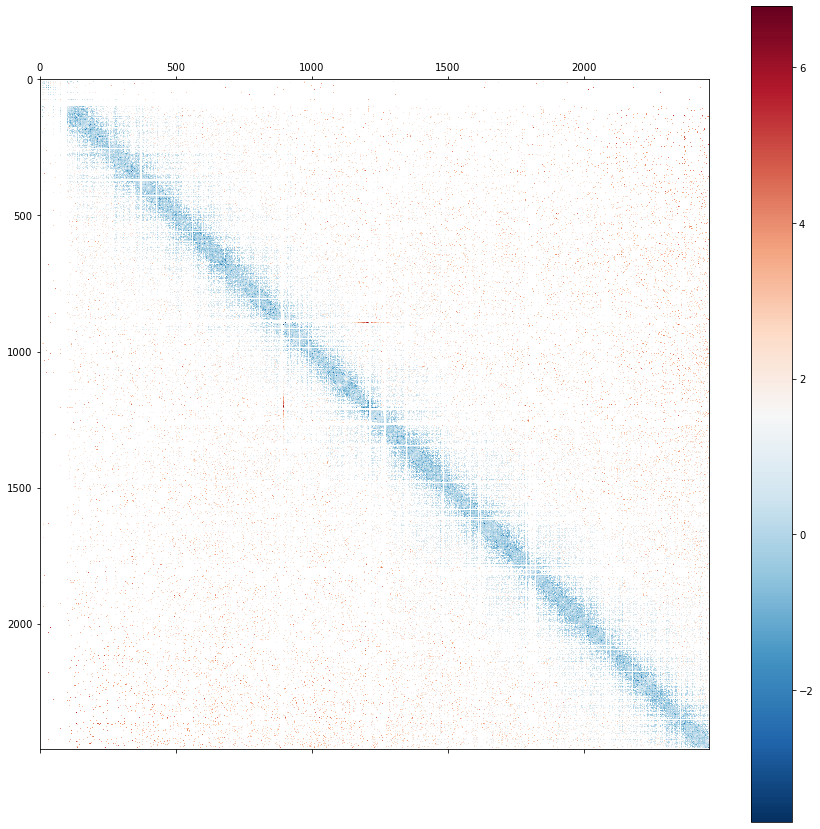

In [5]:
arr_norm_log = np.load('arrs/2kb_chr'+str(chr_num)+'_norm_log.npy')
loops_utils.plot_HiC(arr_norm_log, name='dicty_hic_norm')

In [6]:
loops_info = pandas.read_excel('dicty_loop_positions_Chr1_Chr5_Chr6.xlsx')
loops_info['x'] = loops_info['x'].apply(lambda x: int(x - 1))
loops_info['y'] = loops_info['y'].apply(lambda x: int(x - 1))

### Visualize loops on plots

In [7]:
def get_extrusion_track_color(track):
    if track == 0:
        return 'blue'
    if track == 1:
        return 'lime'
    return 'cyan'

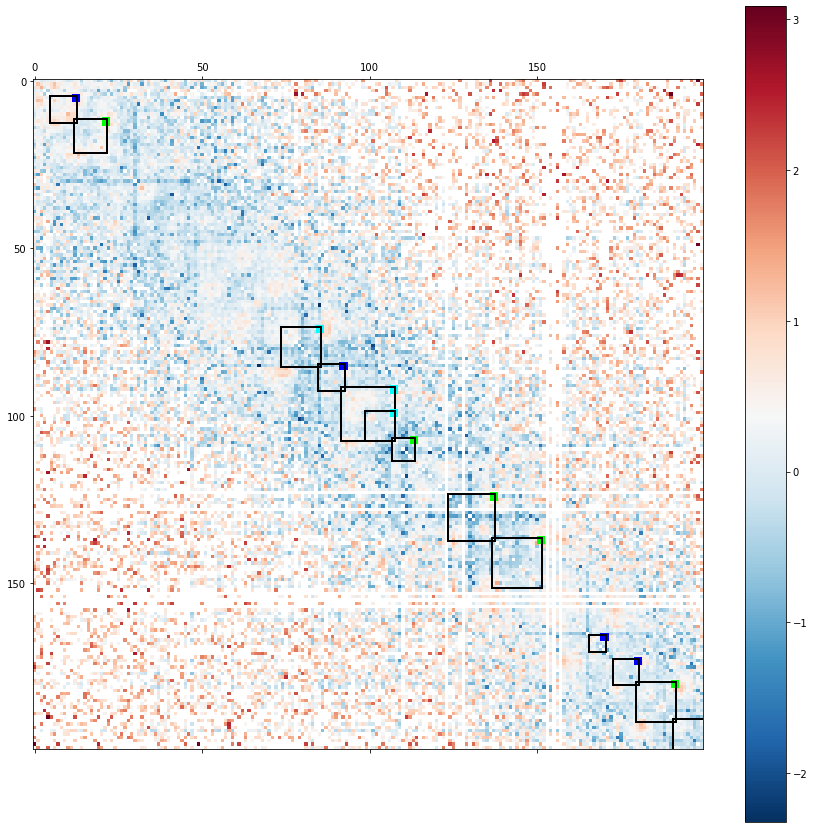

In [8]:
start_bin = 100
end_bin = start_bin + 200

ax = loops_utils.plot_HiC(arr_norm_log[start_bin:end_bin, start_bin:end_bin])

for idx, loop in loops_info[loops_info.chr == chr_num].iterrows():
    ax.add_patch(Rectangle((loop.y-1.5-start_bin, loop.x-1.5-start_bin),
                            1, 1, fill=None, alpha=1,
                            edgecolor=get_extrusion_track_color(loop.extrusion_track),
                            linewidth=5.0))
    
    ax.add_patch(Rectangle((loop.y-0.5-loop['size']/2-start_bin, loop.x-1.5-start_bin),
                            loop['size']/2, loop['size']/2, fill=None, alpha=1,
                            edgecolor='black',
                            linewidth=2.0))
    
plt.savefig('pictures/dicty_loops_viz.png')

# Average loop

### Normalized Hi-C

In [9]:
arr1 = np.load('arrs/2kb_chr'+str(1)+'_norm.npy')
arr5 = np.load('arrs/2kb_chr'+str(5)+'_norm.npy')
arr6 = np.load('arrs/2kb_chr'+str(6)+'_norm.npy')

loops_info_chr1 = loops_info[loops_info.chr == 1]
loops_info_chr5 = loops_info[loops_info.chr == 5]
loops_info_chr6 = loops_info[loops_info.chr == 6]

container1 = LoopChromosomeContainer(arr1, loops_info_chr1)
container5 = LoopChromosomeContainer(arr5, loops_info_chr5)
container6 = LoopChromosomeContainer(arr6, loops_info_chr6)

###### Single loop

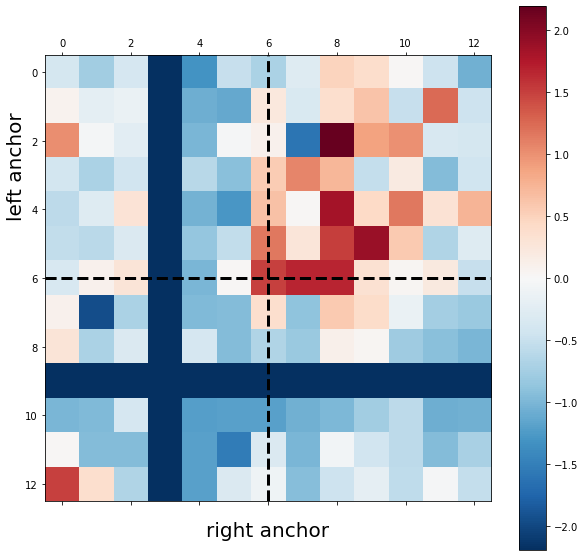

In [10]:
idx = 20
loop_window = container1.get_loop_with_window(idx)
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_window), 
                     figsize=(10,10),
                     name='average_loops/dicty_norm_single_loop', is_loop=True)

### Average loop

###### Chromosome 1

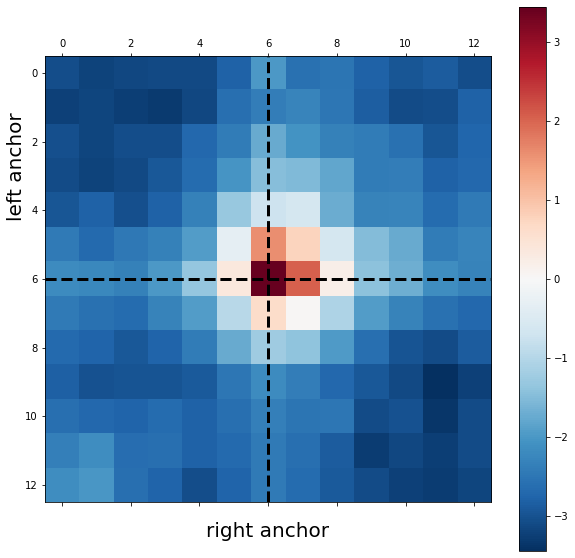

In [11]:
loop_avg1 = container1.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg1), 
                     figsize=(10, 10),
                     name='average_loops/dicty_norm_average_loop_chr1', is_loop=True)

###### Chromosome 5

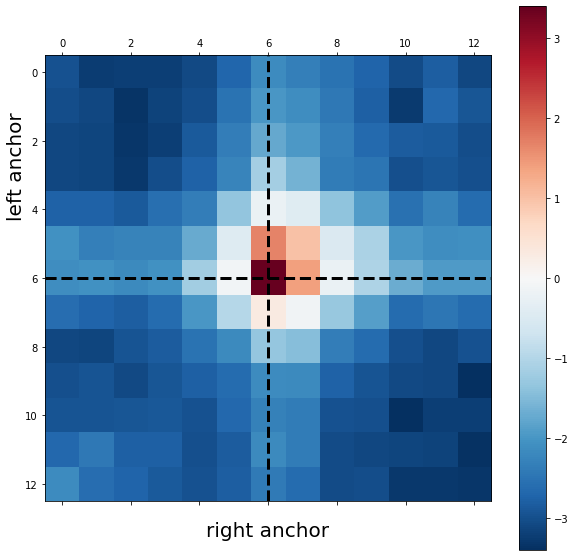

In [12]:
loop_avg5 = container5.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg5), 
                     figsize=(10, 10),
                     name='average_loops/dicty_norm_average_loop_chr5', 
                     is_loop=True)

###### Chromosome 6

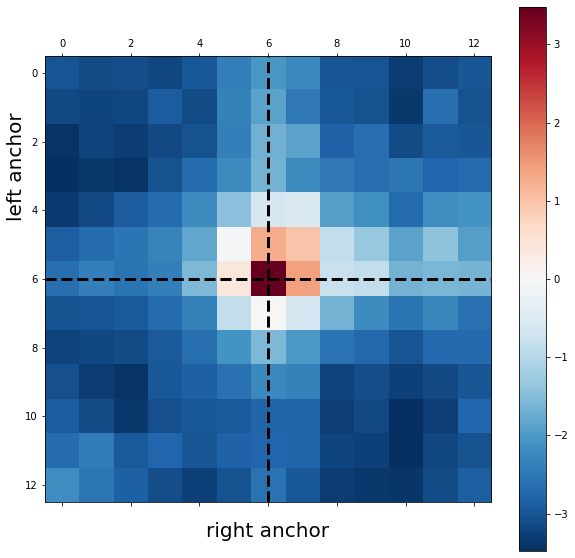

In [13]:
loop_avg6 = container6.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg6), 
                     figsize=(10, 10),
                     name='average_loops/dicty_norm_average_loop_chr6', 
                     is_loop=True)

###### Chromosomes 1,5,6

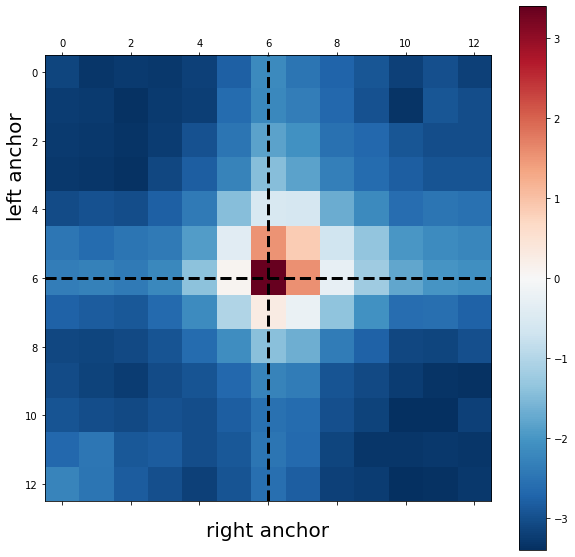

In [14]:
avg = (container1.sum_loop() + container5.sum_loop() + container6.sum_loop())/(container1.get_loops_number() + container5.get_loops_number() + container6.get_loops_number())
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg), 
                     figsize=(10, 10),
                     name='average_loops/dicty_norm_average_loop_chr1_chr5_chr6', 
                     is_loop=True)

### Raw Hi-C

In [15]:
arr1 = np.load('arrs/2kb_chr'+str(1)+'.npy')
arr5 = np.load('arrs/2kb_chr'+str(5)+'.npy')
arr6 = np.load('arrs/2kb_chr'+str(6)+'.npy')

loops_info_chr1 = loops_info[loops_info.chr == 1]
loops_info_chr5 = loops_info[loops_info.chr == 5]
loops_info_chr6 = loops_info[loops_info.chr == 6]

container1 = LoopChromosomeContainer(arr1, loops_info_chr1)
container5 = LoopChromosomeContainer(arr5, loops_info_chr5)
container6 = LoopChromosomeContainer(arr6, loops_info_chr6)

###### Single loop

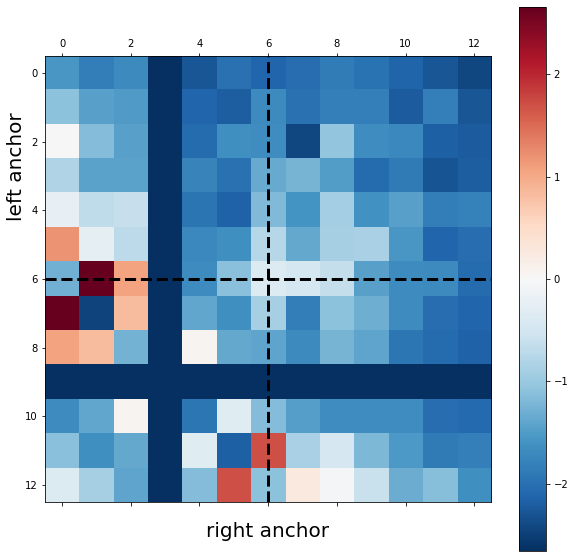

In [16]:
idx = 20
loop_window = container1.get_loop_with_window(idx)
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_window), 
                     figsize=(10,10),
                     name='average_loops/dicty_single_loop', is_loop=True)

### Average loop

###### Chromosome 1

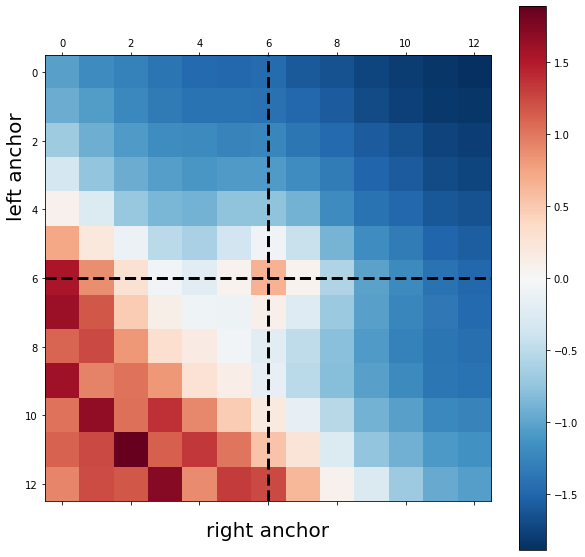

In [17]:
loop_avg1 = container1.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg1), 
                     figsize=(10, 10),
                     name='average_loops/dicty_raw_average_loop_chr1', is_loop=True)

###### Chromosome 5

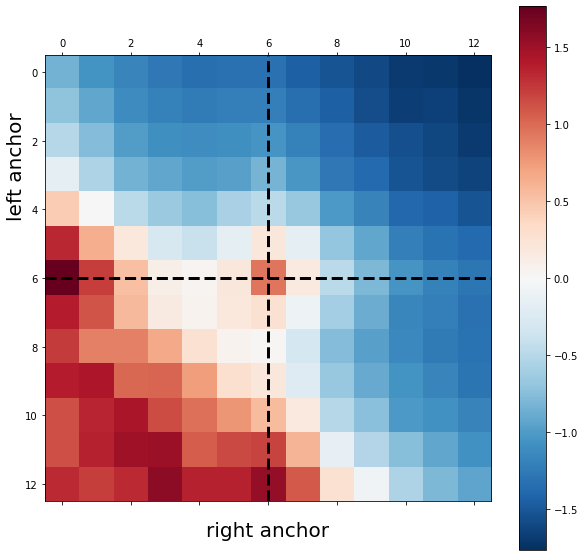

In [18]:
loop_avg5 = container5.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg5), 
                     figsize=(10, 10),
                     name='average_loops/dicty_raw_average_loop_chr1', is_loop=True)

###### Chromosome 6

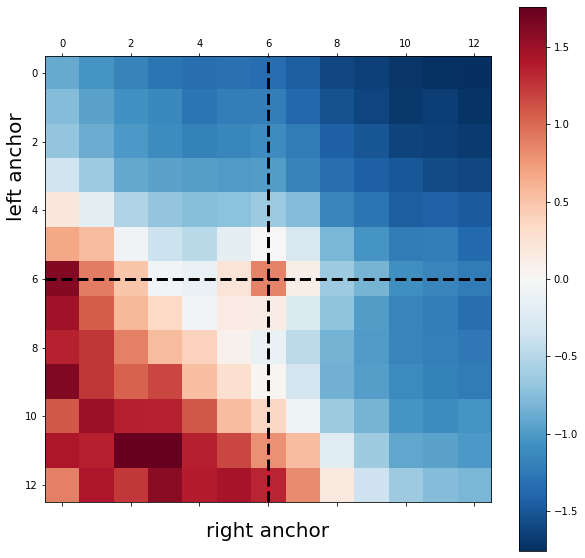

In [19]:
loop_avg6 = container6.avg_loop()
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(loop_avg6), 
                     figsize=(10, 10),
                     name='average_loops/dicty_raw_average_loop_chr1', is_loop=True)

###### Chromosome 1,5,6

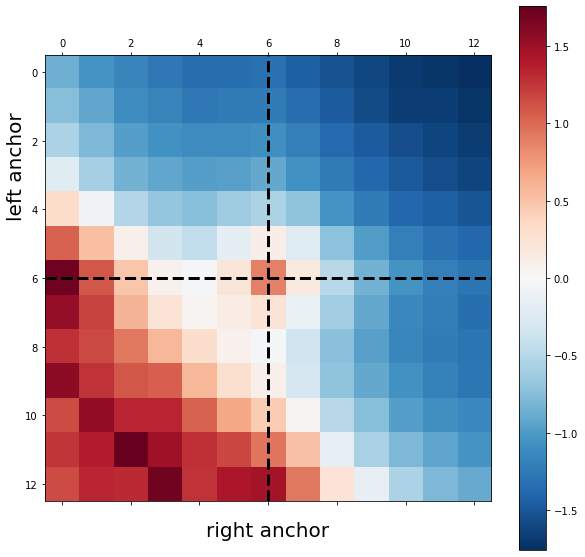

In [20]:
avg = (container1.sum_loop() + container5.sum_loop() + container6.sum_loop())/(container1.get_loops_number() + container5.get_loops_number() + container6.get_loops_number())
loops_utils.plot_HiC(loops_utils.z_norm_zero_middle(avg), 
                     figsize=(10, 10),
                     name='average_loops/dicty_raw_average_loop_chr1_chr5_chr6', 
                     is_loop=True)